In [3]:
#! /usr/bin/python

# **************************************#
# -- coding: utf-8 --                   #
# **************************************#
# Author:                               #
# João Paulo Cardoso do Carmo           #
# Date: 2025-08-30                      #
# **************************************#

#*********** Imports ***********
import matplotlib.pyplot as plt
import branca.colormap as cm
import seaborn as sns
import pandas as pd
import os

In [7]:

def task_03():
    """
    - Faça 5 visualizações que possam ser úteis para o gestor público tomar decisões
    sobre onde alocar recursos para fiscalização, elencando os municípios/biomas
    que mais necessitam de atenção. As visualizações podem ser feitas com qualquer
    biblioteca de visualização de dados que você preferir (matplotlib, seaborn, plotly, bokeh, folium, etc)
    e podem ser estáticas ou interativas. Seja criativo e tente fazer visualizações que sejam claras,
    esteticamente agradáveis (PS: Pense que o gestor público não é um cientista de dados e que não tem
    conhecimento de programação ou de ciência de dados e vai apresentar os resultados que você plotar
    neste notebook para o governador do estado alocar mais recursos no combate ao desmatamento ilegal).


    Observações:
    - Como dependia dos dados unificados, salvei um csv na task anterior para conseguir
    ler sem precisar roda-la novamente
    - Salvei os dados em PDF e html, pois assim o gestor não precisará mostrar os códigos e sim documentos.
    """
    # Read csv
    path_date = os.path.join("..", "dados", "desmatamentoDadosUnificados.csv")
    df = pd.read_csv(path_date)

    # Create folder to save plots
    path_save = os.path.join("..", "dados", "task_03")
    os.makedirs(path_save, exist_ok=True)

    # Convert area from km² to hectares
    df["area_ha"] = df["area_km2"] * 100

    # --- 1. Top 10 municipalities (NuFis) with the highest deforested area ---
    top_municipios = df.groupby("NuFis")["area_ha"].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_municipios.values, y=top_municipios.index, palette="Reds_r")
    plt.title("Top 10 Municípios com Maior Área Desmatada (ha)")
    plt.xlabel("Área Desmatada (ha)")
    plt.ylabel("Município")
    plt.tight_layout()
    plt.savefig(os.path.join(path_save, "top_10_municipios.pdf"))
    plt.show()
    plt.close()

    # --- 2. Deforested area by biome ---
    bioma_sum = df.groupby("Bioma")["area_ha"].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x=bioma_sum.index, y=bioma_sum.values, palette="Greens_r")
    plt.title("Área Desmatada por Bioma (ha)")
    plt.xlabel("Bioma")
    plt.ylabel("Área Desmatada (ha)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(path_save, "area_por_bioma.pdf"))
    plt.show()
    plt.close()

    # --- 3. Monthly deforestation ---
    months = ["agosto", "setembro"]
    # Group by month
    mensal = df.groupby("mes")["area_ha"].sum().reset_index()

    # Ensure all months exist
    mensal = mensal.set_index("mes").reindex(months, fill_value=0).reset_index()
    # Plot
    plt.figure(figsize=(8,6))
    plt.plot(mensal["mes"], mensal["area_ha"], marker='o', color='orange')
    plt.title("Monthly Deforestation (ha)")
    plt.xlabel("Month")
    plt.ylabel("Deforested Area (ha)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(path_save, "desmatamento_mensal.pdf"))
    plt.show()
    plt.close()

    # --- 4. Heatmap municipality × biome ---
    pivot = df.pivot_table(index="NuFis", columns="Bioma", values="area_ha", aggfunc="sum").fillna(0)
    plt.figure(figsize=(12,8))
    sns.heatmap(pivot, cmap="Reds", linewidths=.5)
    plt.title("Desmatamento por Município e Bioma (ha)")
    plt.xlabel("Bioma")
    plt.ylabel("Município")
    plt.tight_layout()
    plt.savefig(os.path.join(path_save, "heatmap_municipio_bioma.pdf"))
    plt.show()
    plt.close()

    # --- 5. Proportion of deforested area per municipality within each biome ---
    # Group by Biome and Municipality
    prop_df = df.groupby(["Bioma", "NuFis"])["area_ha"].sum().reset_index()

    # Pivot to have municipalities as columns for stacked bar
    pivot_prop = prop_df.pivot(index="Bioma", columns="NuFis", values="area_ha").fillna(0)

    # Normalize to get proportions
    pivot_prop_norm = pivot_prop.div(pivot_prop.sum(axis=1), axis=0)

    # Plot stacked bar chart
    pivot_prop_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
    plt.title("Proportion of Deforested Area per Municipality within each Biome")
    plt.xlabel("Biome")
    plt.ylabel("Proportion of Area")
    plt.legend(title="Municipality", bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(path_save, "desmatamento_por_municipio_bioma.pdf"))
    plt.show()
    plt.close()

    print("Visualizações geradas e salvas em:", path_save)

C:\Users\leobelini\AppData\Local\Temp\ipykernel_14672\3619690060.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_municipios.values, y=top_municipios.index, palette="Reds_r")


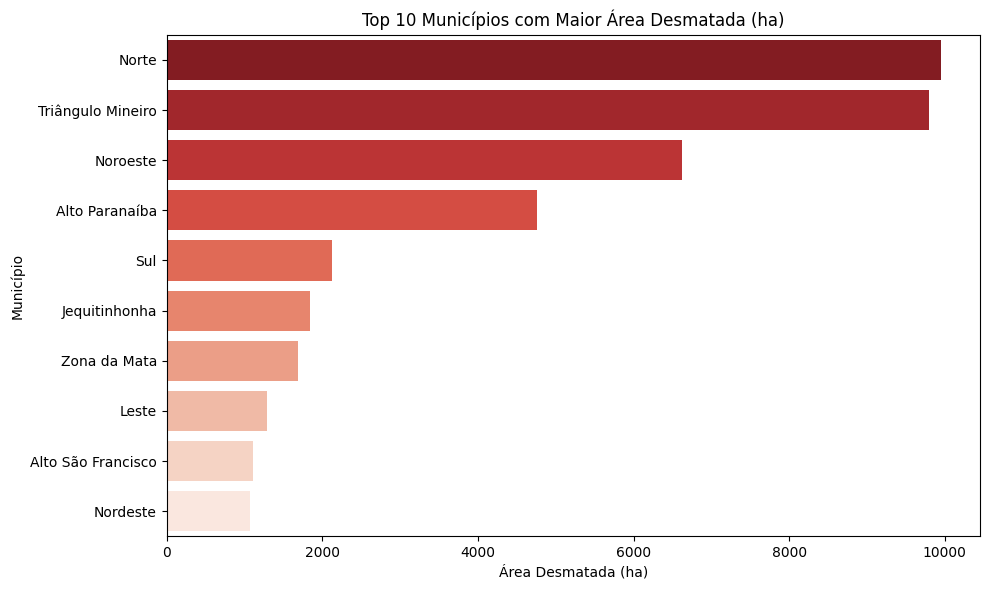

C:\Users\leobelini\AppData\Local\Temp\ipykernel_14672\3619690060.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bioma_sum.index, y=bioma_sum.values, palette="Greens_r")


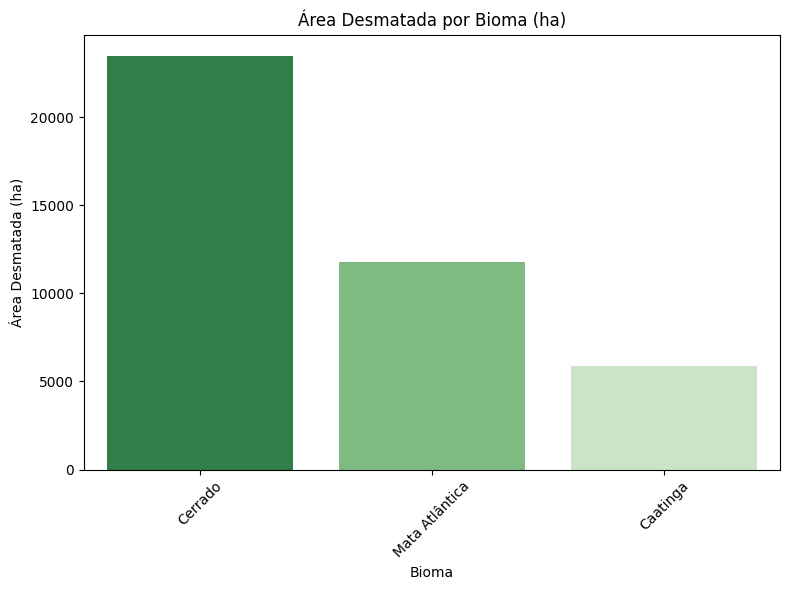

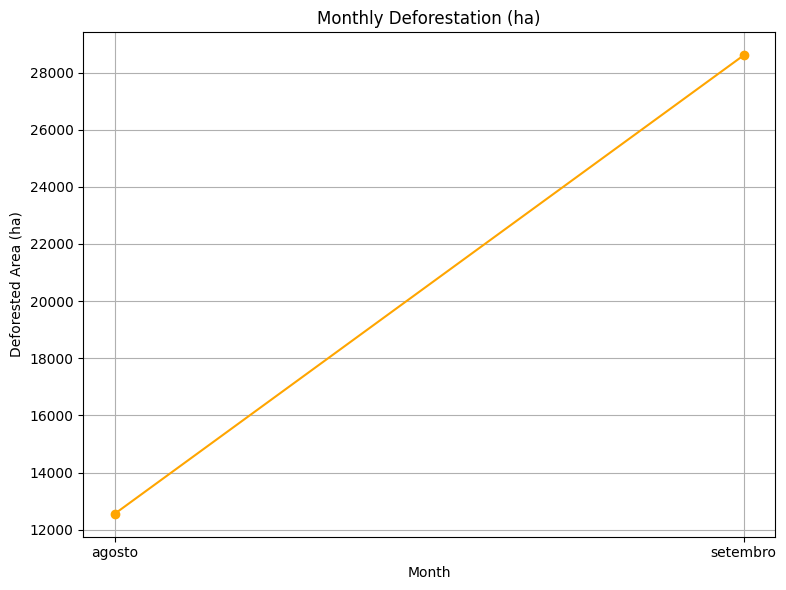

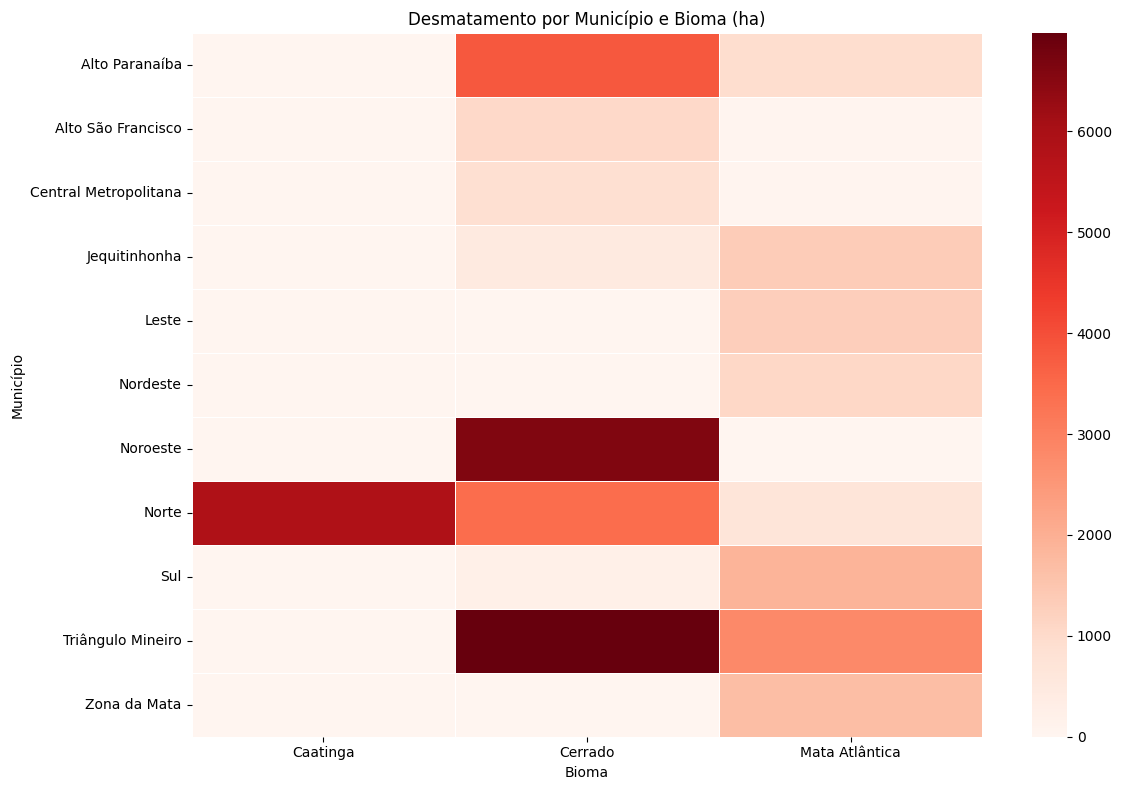

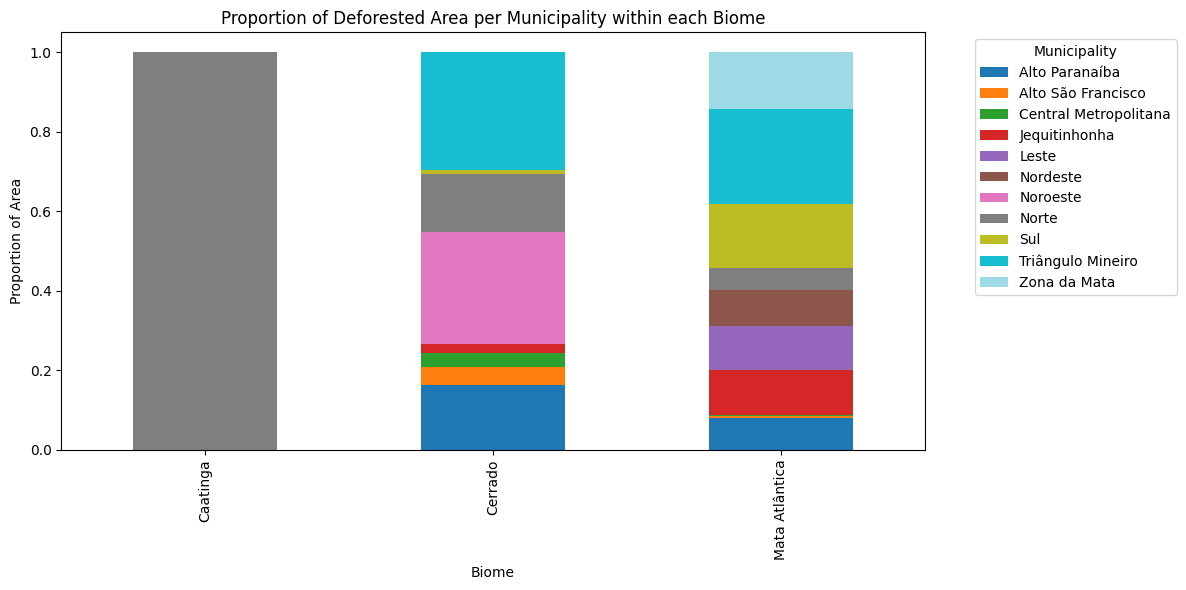

Visualizações geradas e salvas em: ..\dados\task_03


In [8]:
task_03()